In [1]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import umap
import matplotlib.pyplot as plt

In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('../data/raw/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [83]:
spine = open("../data/processed/1000d - spine/word2vec_original_15k_1000d_train.txt.spine","r") .read().split('\n')
# open("../data/raw/GoogleNews-vectors-negative300.bin.gz").readlines()
spine.pop(15000)
len(spine)

''

In [86]:
spine_tokens = []
spine_embeddings = []

for i, line in enumerate(spine):
#     if i %100 == 0:
#         print("Processing:", i)
    tokens = line.strip().split()
    spine_tokens.append(tokens[0])
    spine_embeddings.append([float(i) for i in tokens[1:]])

In [92]:
spine_tokens[:10]

['writings',
 'yellow',
 'four',
 'gag',
 'prefix',
 'woods',
 'spiders',
 'hanging',
 'woody',
 'cyprus']

In [91]:
spine_tokens.index("germany")

4199

In [88]:
type(spine_tokens)

list

In [3]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [105]:
model.most_similar(positive=['France', 'Berlin'], negative=['Germany'])

[('Paris', 0.7672388553619385),
 ('French', 0.6049168109893799),
 ('Parisian', 0.5810437202453613),
 ('Colombes', 0.5599985718727112),
 ('Hopital_Europeen_Georges_Pompidou', 0.555890679359436),
 ('Melun', 0.551270067691803),
 ('Dinard', 0.5451847314834595),
 ('Brussels', 0.5420989990234375),
 ('Mairie_de', 0.5337448120117188),
 ('Cagnes_sur_Mer', 0.531246542930603)]

In [107]:
model.most_similar(positive=['Germany', 'Paris'], negative=['France'])

[('Berlin', 0.7644002437591553),
 ('Frankfurt', 0.7329736948013306),
 ('Dusseldorf', 0.7009456753730774),
 ('Munich', 0.6773864030838013),
 ('Cologne', 0.6470192670822144),
 ('Düsseldorf', 0.6399551630020142),
 ('Stuttgart', 0.6361044645309448),
 ('Munich_Germany', 0.6238142251968384),
 ('Budapest', 0.6192865371704102),
 ('Hamburg', 0.6168562769889832)]

In [108]:
model.most_similar(positive=['Germany', 'Paris'], negative=['Berlin'])

[('France', 0.7884093523025513),
 ('Belgium', 0.6197876930236816),
 ('extradites_Noriega', 0.5764307379722595),
 ('Villebon_Sur_Yvette', 0.5683187246322632),
 ('Spain', 0.566477358341217),
 ('Italy', 0.5654898881912231),
 ('Switzerland', 0.560969352722168),
 ('French', 0.5420510768890381),
 ('Marseille', 0.5417743921279907),
 ('PARIS_AFX_Gaz_de', 0.532699704170227)]

In [4]:
model.most_similar("Paris")

[('Parisian', 0.6789354681968689),
 ('Hopital_Europeen_Georges_Pompidou', 0.6536554098129272),
 ('Spyker_D##_Peking', 0.6336591839790344),
 ('France', 0.633491039276123),
 ('Pantheon_Sorbonne', 0.6312517523765564),
 ('Aeroports_De', 0.621803879737854),
 ('Grigny_south', 0.6194689273834229),
 ('Place_Denfert_Rochereau', 0.6028153896331787),
 ('guest_Olivier_Dolige', 0.6024351119995117),
 ('Lazard_Freres_Banque', 0.5998712182044983)]

In [5]:
model.most_similar("France")

[('French', 0.7000749707221985),
 ('extradites_Noriega', 0.6946742534637451),
 ('Belgium', 0.6933180689811707),
 ('Villebon_Sur_Yvette', 0.6776412725448608),
 ('PARIS_AFX_Gaz_de', 0.6628001928329468),
 ('called_Xynthia_blew', 0.6588140726089478),
 ('Brive_la', 0.644013524055481),
 ('COLVILLE_SUR_MER', 0.6336530447006226),
 ('Paris', 0.6334909796714783),
 ('Germany', 0.6270755529403687)]

In [6]:
model['France']

array([ 4.85839844e-02,  7.86132812e-02,  3.24218750e-01,  3.49121094e-02,
        7.71484375e-02,  3.54003906e-02, -1.25976562e-01, -3.86718750e-01,
       -1.31835938e-01,  2.91748047e-02, -1.44531250e-01, -1.42578125e-01,
        1.79687500e-01, -2.75390625e-01, -1.65039062e-01,  9.32617188e-02,
        1.17187500e-01,  1.82617188e-01,  6.10351562e-02,  1.14257812e-01,
        1.82617188e-01, -1.16699219e-01, -3.24707031e-02, -7.56835938e-02,
        9.64355469e-03,  8.59375000e-02, -2.85156250e-01, -2.55859375e-01,
        3.01513672e-02,  2.16796875e-01, -1.00097656e-01,  2.85644531e-02,
       -2.81250000e-01, -8.39843750e-02, -2.02636719e-02, -1.96289062e-01,
       -4.78515625e-02,  7.12890625e-02, -1.42578125e-01, -1.13525391e-02,
        1.16210938e-01,  7.22656250e-02,  1.47460938e-01,  1.50390625e-01,
        1.40625000e-01,  2.47070312e-01, -1.69921875e-01,  7.76367188e-02,
       -5.44433594e-02,  1.66992188e-01, -1.45507812e-01,  2.12402344e-02,
       -7.51953125e-02,  

In [ ]:
## Name fig

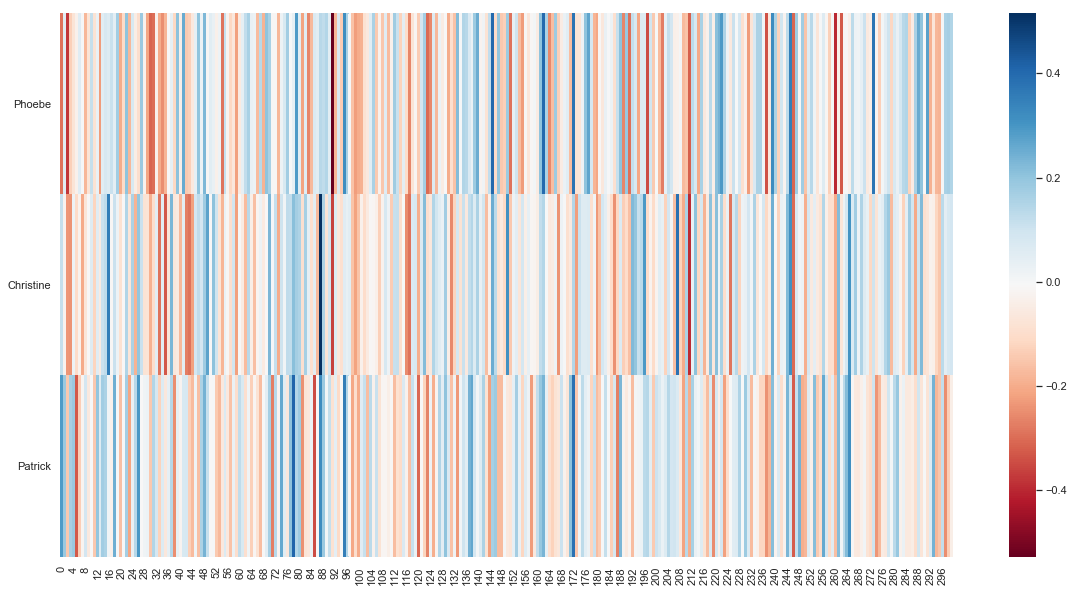

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
name_htmap = sns.heatmap([model['Phoebe'], model['Christine'], model['Patrick']], cmap='RdBu')
name_htmap.set_yticklabels(['Phoebe', 'Christine', 'Patrick'], rotation='horizontal')
plt.savefig("name_heatmap.png", bbox_inches= 'tight', transparent = True)

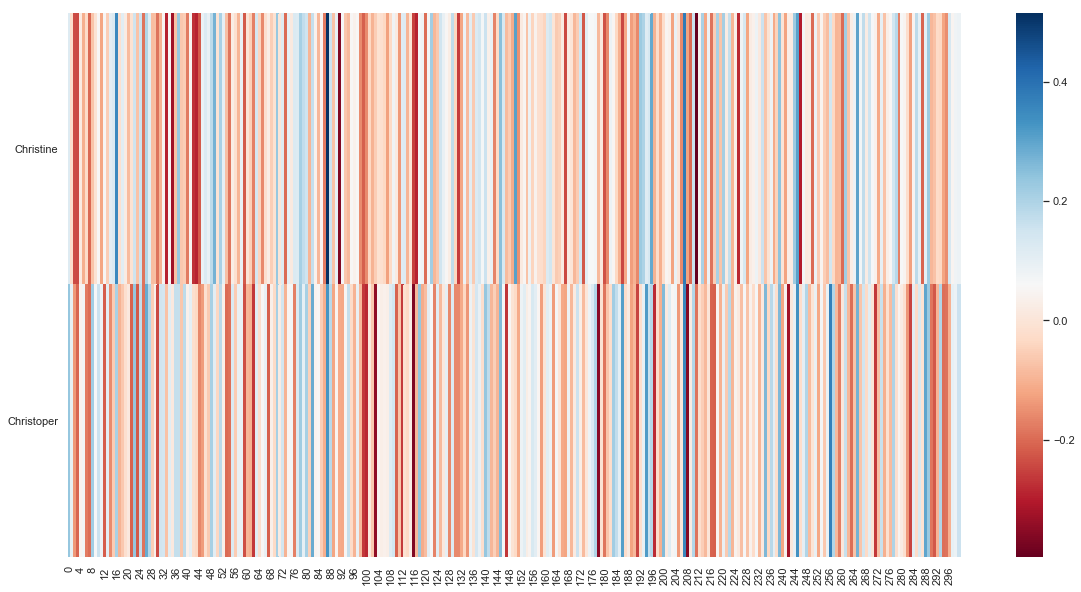

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
name_htmap = sns.heatmap([model['Christine'], model['Christoper']], cmap='RdBu')
name_htmap.set_yticklabels(['Christine', 'Christoper'], rotation='horizontal')
plt.savefig("name_heatmap.png", bbox_inches= 'tight')

In [7]:
model.similar_by_word('France')

[('French', 0.7000749707221985),
 ('extradites_Noriega', 0.6946742534637451),
 ('Belgium', 0.6933180689811707),
 ('Villebon_Sur_Yvette', 0.6776412725448608),
 ('PARIS_AFX_Gaz_de', 0.6628001928329468),
 ('called_Xynthia_blew', 0.6588140726089478),
 ('Brive_la', 0.644013524055481),
 ('COLVILLE_SUR_MER', 0.6336530447006226),
 ('Paris', 0.6334909796714783),
 ('Germany', 0.6270755529403687)]

## All available vocab in word2vec model

In [26]:
vocab = model.vocab.keys()
vocab_list = list(vocab)

In [29]:
vocab.get("French")

AttributeError: 'dict_keys' object has no attribute 'get'

In [30]:
vocab_list

In [28]:
vocab_list[:50]

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out']

## Heatmap

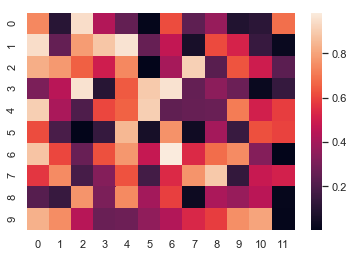

In [2]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [4]:
uniform_data.shape

(10, 12)

## Countries
List: https://gist.github.com/kalinchernev/486393efcca01623b18d

In [93]:
countries = np.array(['Australia', 'Germany', 'France', 'China']) # America
capitals = np.array(['Canberra', 'Berlin', 'Paris','Beijing'])

In [95]:
countries[0].lower()

'australia'

In [41]:
countries_vec = np.array([model[country] for country in countries])
capital_vec = np.array([model[capital] for capital in capitals])

In [99]:
countries_spline_1000d = np.array([spine_embeddings[spine_tokens.index(country.lower())] for country in countries])
capital_spline_1000d = np.array([spine_embeddings[spine_tokens.index(capital.lower())] for capital in capitals])

In [114]:
plt.clf()
ax = sns.heatmap(words_weight_heatmap, cmap='RdBu_r', center=0, xticklabels=0)
# ax = sns.heatmap(words_svd, cmap=sns.diverging_palette(0, 255, sep=32, n=256), center=0, xticklabels=0)
plt.subplots_adjust(left=0, right=1, top=0.86, bottom=0.23)
ax.set_yticklabels(words,rotation='horizontal',fontsize=12)
# plt.savefig('heatmap_svd.png', format='png',dpi=300)
plt.show()

(4, 1000)

In [167]:
countries_spline_1000d

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02825896],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

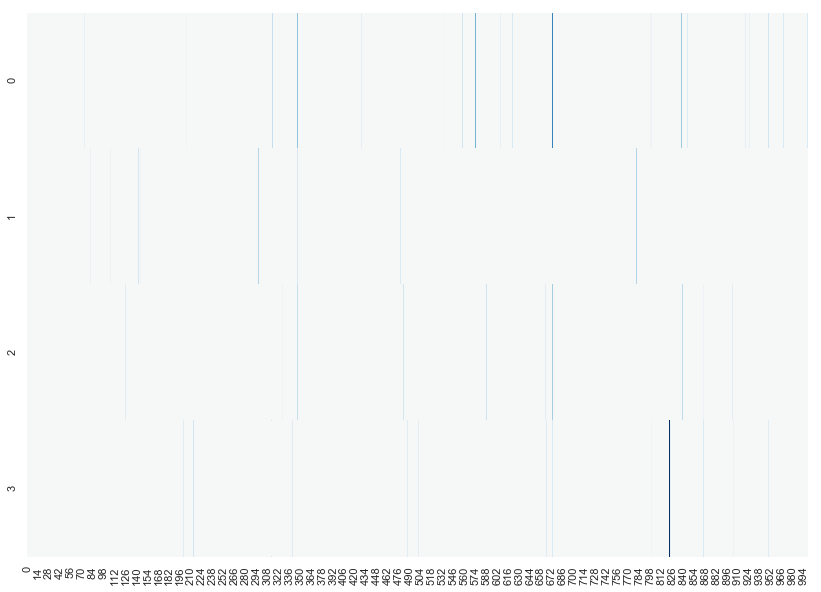

In [168]:
trial = sns.heatmap(countries_spline_1000d, cbar_ax = cbar_ax, cmap='RdBu', center = 0)
trial

Text(0.5,1,'Difference between Countries and Capital')

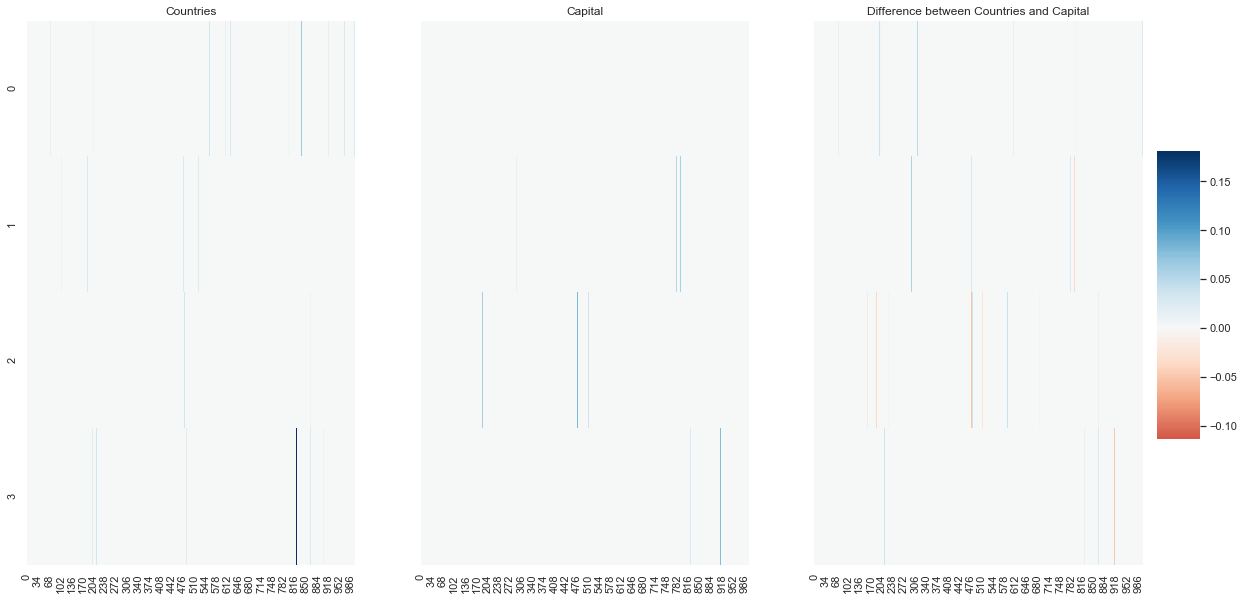

In [169]:
fig, ax = plt.subplots(1,3,figsize=(20,10), sharex=True, sharey = True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

_ = sns.heatmap(countries_spline_1000d, ax = ax[0], cbar_ax = cbar_ax, center = 0, cmap='RdBu')
ax[0].set_title("Countries")
_ = sns.heatmap(capital_spline_1000d, ax = ax[1], cbar_ax = cbar_ax, center = 0, cmap='RdBu') 
ax[1].set_title("Capital")

diff_vec_spline = countries_spline_1000d - capital_spline_1000d
_ = sns.heatmap(diff_vec_spline, ax = ax[2], cbar_ax = cbar_ax, center=0, cmap='RdBu')
ax[2].set_title("Difference between Countries and Capital")
# ax[1] = sns.heatmap(capital_vec)

Text(0.5,1,'Difference between Countries and Capital')

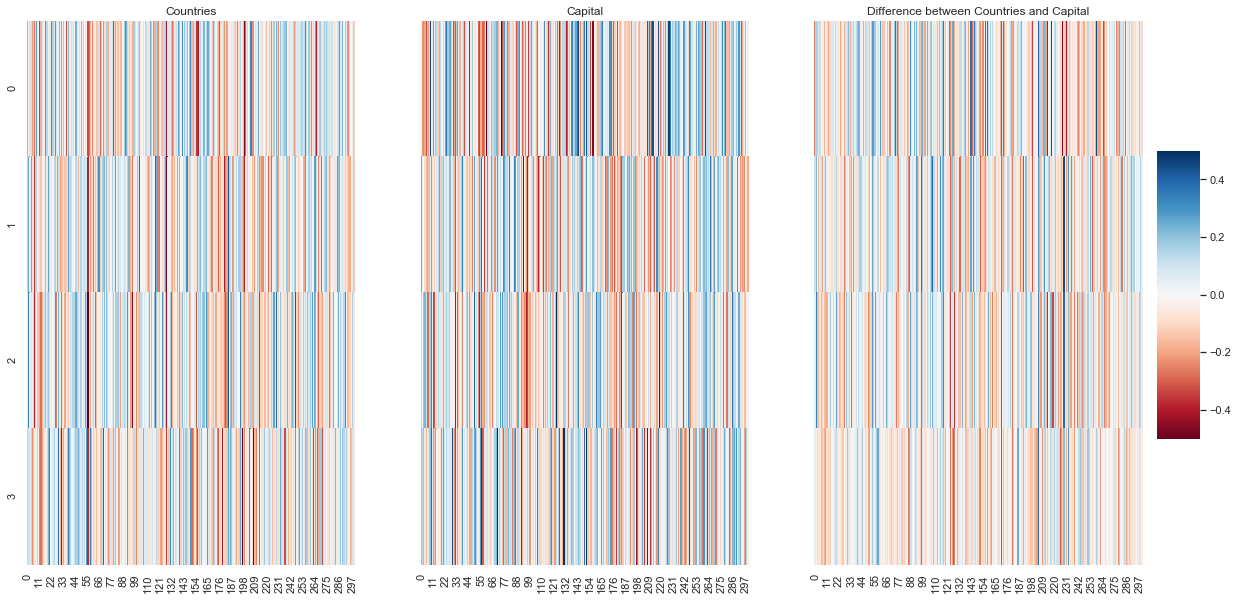

In [170]:
fig, ax = plt.subplots(1,3,figsize=(20,10), sharex=True, sharey = True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

_ = sns.heatmap(countries_vec, ax = ax[0], vmin = -.5, vmax = 0.5, cbar_ax = cbar_ax, center = 0, cmap='RdBu')
ax[0].set_title("Countries")
_ = sns.heatmap(capital_vec, ax = ax[1], vmin = -.5, vmax = 0.5,cbar_ax = cbar_ax, center = 0, cmap='RdBu')
ax[1].set_title("Capital")

diff_vec = countries_vec - capital_vec
_ = sns.heatmap(diff_vec, ax = ax[2],vmin = -.5, vmax = 0.5, cbar_ax = cbar_ax, center = 0, cmap='RdBu')
ax[2].set_title("Difference between Countries and Capital")

In [50]:
diff_vec.shape

(4, 300)

In [15]:
# countries = open("../data/raw/countries.txt","r") 
countries_list = open("../data/raw/countries.txt","r") .read().split('\n')

In [16]:
countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua & Deps',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Rep',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo {Democratic Rep}',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indones

In [17]:
countries = countries_list[:1]

## UMAP
https://github.com/lmcinnes/umap

In [9]:
from sklearn.datasets import load_digits, load_iris
iris = load_iris()
digits = load_digits()

reducer = umap.UMAP()
embedding = reducer.fit_transform(iris.data)
embedding.shape

# sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [12]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(iris.data)
embedding.shape

/Users/pwong/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

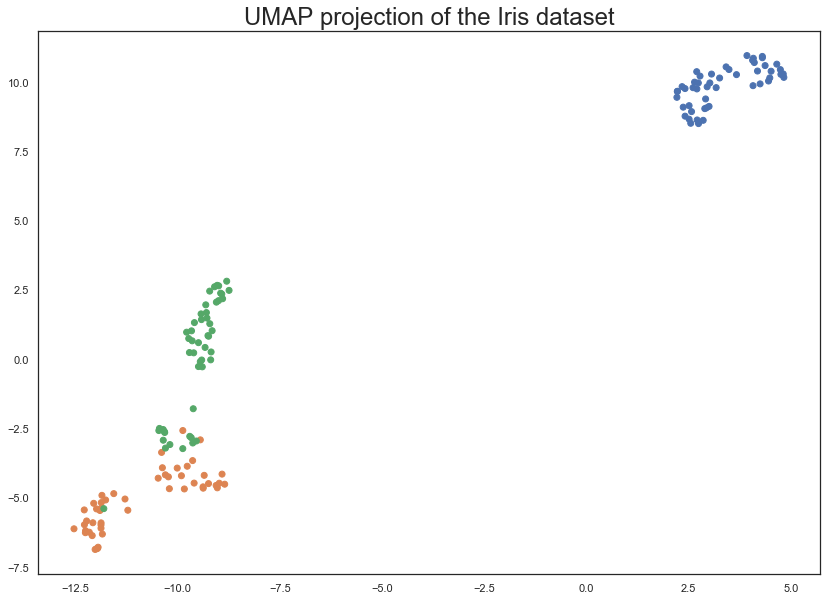

In [16]:
# sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

## List of vocabularies in word2vec
https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary